## Observations and Insights 

# 3 OBSERVATIONS:

* Capomulin and Ramicane had the most data points observable in this study.

* Capomulin and Ramicane also appear to be the most successful of the drugs used in this study.

* There appears to be a positvie correlation between tumor volume and weight of the particular mouse. 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = study_results.merge(mouse_metadata, on = 'Mouse ID')

# Display the data table for preview
merged_data.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [41]:
# Checking the number of mice.
mice_ID = merged_data['Mouse ID'].unique()

mouse_num = len(mice_ID)

mouse_num

249

In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.loc[:, ['Mouse ID', "Timepoint"]]
cleaned_data['Mouse ID'].duplicated()
cleaned_data[cleaned_data['Mouse ID'].duplicated()]

duplicate_IDs = cleaned_data['Mouse ID'].unique()

cleaned_data


,Mouse ID,Timepoint
0,b128,0
1,b128,5
2,b128,10
3,b128,15
4,b128,20
...,...,...
1888,m601,25
1889,m601,30
1890,m601,35
1891,m601,40


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame(merged_data.groupby('Drug Regimen').count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df["Mean"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

summary_df["Median"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

summary_df["Standard Deviation"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

summary_df["Variance"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

summary_df["SEM"] = pd.DataFrame(merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Assemble the resulting series into a single summary dataframe.

summary_df = summary_df[['Mouse ID', 'Mean', 'Median', 'Standard Deviation', 'Variance', 'SEM']]
summary_df = summary_df.rename(columns = {'Mouse ID' : 'Trials'})
summary_df.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [44]:
# Using the aggregation method, produce the same summary statistics in a single line

newthing = merged_data.groupby('Drug Regimen')

new_DF = newthing.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

new_DF.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

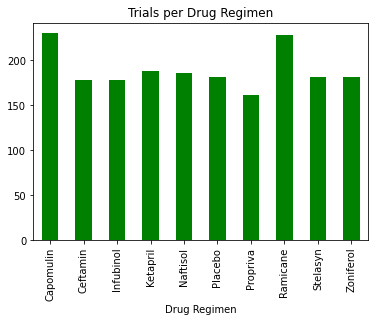

<Figure size 432x288 with 0 Axes>

In [45]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
datapoints = summary_df[["Trials"]]
datapoints.plot(kind='bar', figsize = (6,4), color = 'g', legend = False)
plt.title("Trials per Drug Regimen")
plt.show()
plt.tight_layout()

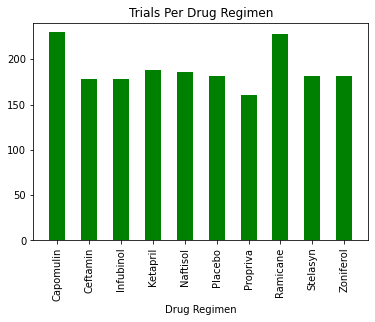

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

plt.figure(figsize =(6,4))
plt.bar(x_axis, datapoints["Trials"], color = 'g', width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation='vertical')

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Trials"])+10)

plt.title("Trials Per Drug Regimen")
plt.xlabel("Drug Regimen")

plt.show()

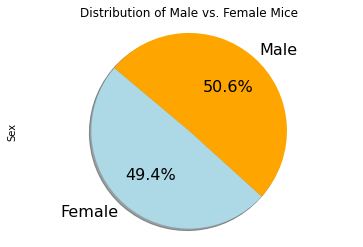

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = merged_data.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())
gender_group_count.plot(kind='pie', y='Sex', \
                       title="Distribution of Male vs. Female Mice", startangle=140,\
                       autopct='%1.1f%%', shadow=True, fontsize=16, colors = ['lightblue','orange'],legend=False)

plt.axis('equal')

plt.show()

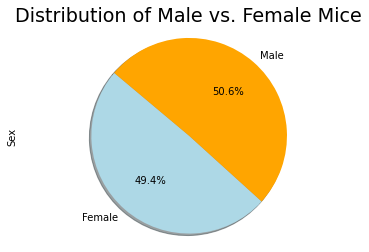

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)

gender_counts = gender_group_count['Sex']

colors = ["lightblue", "orange"]

plt.pie(gender_counts, labels=genders, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of Male vs. Female Mice")
plt.ylabel('Sex')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

- Calculate the final tumor volume of each mouse across four of the treatment regimens:

    Capomulin, Ramicane, Infubinol, and Ceftamin

- Calculate the IQR and quantitatively determine if there are any potential outliers. 

     - Locate the rows which contain mice on each drug and get the tumor volumes
    
    - add subset 
      
    - Determine outliers using upper and lower bounds

In [49]:
cap_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
ram_df = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane", :]
inf_df = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol", :]
ceft_df = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [50]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, merged_data, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [51]:
#Capomulin
tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [52]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, merged_data, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [53]:
#Ramicane
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [54]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, merged_data, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [55]:
#Infubinol
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [56]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, merged_data, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [57]:
#Ceftamin
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


- Generate a Box Plot of the final tumor volume of each mouse across four regimens of interest.

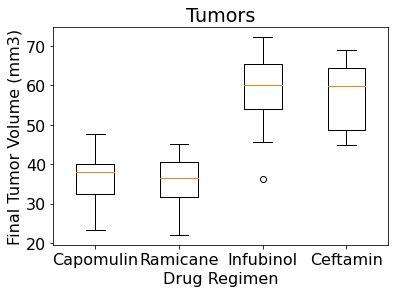

In [58]:
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()



## Line and Scatter Plots

- Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [59]:
forline_df = cap_df.loc[cap_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1701,b742,0,45.000000,0,Capomulin,Male,7,21
1702,b742,5,41.534097,0,Capomulin,Male,7,21
1703,b742,10,41.999228,0,Capomulin,Male,7,21
1704,b742,15,39.524843,0,Capomulin,Male,7,21
1705,b742,20,37.950355,0,Capomulin,Male,7,21


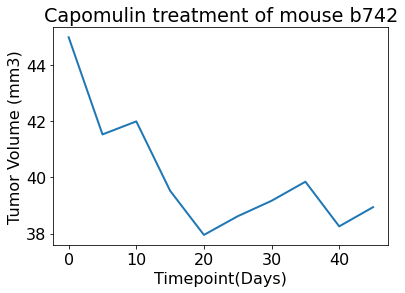

In [60]:
x_axis_tp = forline_df["Timepoint"]
tum_size = forline_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse b742")
plt.plot(x_axis_tp, tum_size, linewidth=2, markersize = 12)
plt.xlabel('Timepoint(Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

- Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


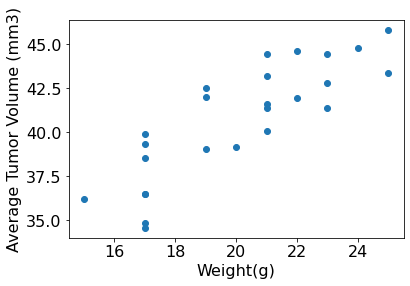

In [61]:
cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

- Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [62]:
corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)

print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [63]:
model = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [64]:
slope = 0.9544396890241045
intercept = 21.552160532685015

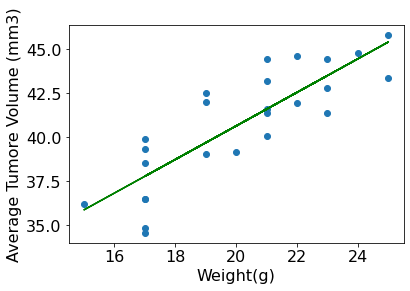

In [65]:
y_values = cap_avg['Weight (g)'] * slope + intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'], y_values, color = "green")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()